Привет!
Прочитайте данные из файла.
Определите оптимальное количество кластеров для прочитанных данных.
Постройте оптимальное разбиение на кластеры.
Спрогнозируйте классы для векторов
[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
и
[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

Постройте график метрики "силуэт" в зависимости от количества кластеров.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans

sns.set_style("darkgrid")

In [40]:
data = np.loadtxt('X.csv')

In [45]:
data

array([[ 0.14901425,  0.09722519, -0.42461122,  0.07514786,  0.10733621],
       [-0.04147929, -0.11552468, -0.1261936 ,  0.10393446,  0.16823536],
       [ 0.19430656, -0.2030766 , -0.10281435, -0.20400742,  0.32491537],
       ...,
       [ 4.91291764,  5.28029597,  4.70851579,  5.17590921,  5.36250987],
       [ 5.08021769,  4.58993639,  5.36012417,  5.37148492,  5.30721876],
       [ 5.09650934,  4.93257038,  4.80293172,  5.00638147,  5.17775808]])

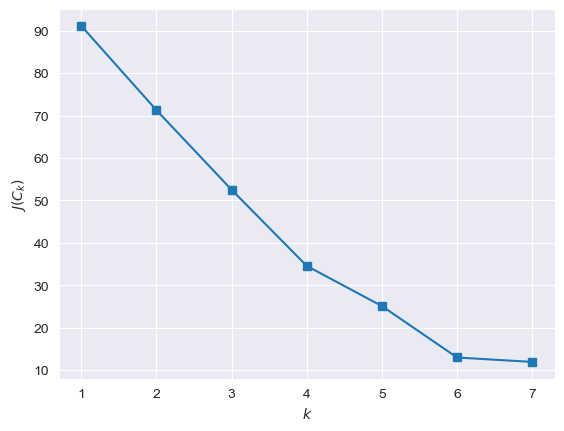

In [42]:
# Применяем метод локтя для определения оптимального количества кластеров
# из графика видно, что оптимальное количество 6 кластеров

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [52]:
#  обучаем модель исэодя из 6 кластеров
kmeans = KMeans(n_clusters=6, random_state=1).fit(data)

In [58]:
# Проверяем к какому кластеру относятся контрольные векторы
X_1 = [[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]]
kmeans.predict(X_1)

array([0], dtype=int32)

In [59]:
X_2 = [[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]]
kmeans.predict(X_2)

array([1], dtype=int32)

In [57]:
# Метрика Силуэт
from sklearn import metrics
metrics.silhouette_score(data, kmeans.labels_)

0.8122759257111298